# Intermediate Data Visualization with Seaborn

## Seaborn Introduction

### Reading a csv file

Before you analyze data, you will need to read the data into a
[pandas](https://pandas.pydata.org/) DataFrame. In this exercise, you
will be looking at data from US School Improvement Grants in 2010. This
program gave nearly \$4B to schools to help them renovate or improve
their programs.

This first step in most data analysis is to import `pandas` and
`seaborn` and read a data file in order to analyze it further.

*This course introduces a lot of new concepts, so if you ever need a
quick refresher, download the [Seaborn Cheat
Sheet](https://images.datacamp.com/image/upload/v1676302629/Marketing/Blog/Seaborn_Cheat_Sheet.pdf)
and keep it handy!*

**Instructions**

- Import `pandas` and `seaborn` using the standard naming conventions.
- The path to the csv file is stored in the `grant_file` variable.
- Use `pandas` to read the file.
- Store the resulting DataFrame in the variable `df`.

**Answer**


In [112]:
!git clone https://github.com/datttrian/intermediate-data-visualization-with-seaborn

Cloning into 'intermediate-data-visualization-with-seaborn'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (339/339), done.
remote: Compressing objects: 100% (326/326), done.
remote: Total 339 (delta 8), reused 336 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (339/339), 23.04 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [113]:
!cp intermediate-data-visualization-with-seaborn/src/* .

cp: -r not specified; omitting directory 'intermediate-data-visualization-with-seaborn/src/notebook_files'


In [114]:
!rm -rf intermediate-data-visualization-with-seaborn

In [115]:
%pip --quiet install pandas seaborn

In [116]:
# added/edited
grant_file = "https://assets.datacamp.com/production/course_7030/datasets/schoolimprovement2010grants.csv"

In [117]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv(grant_file)


### Comparing a histogram and displot

The `pandas` library supports simple plotting of data, which is very
convenient when data is already likely to be in a `pandas` DataFrame.

Seaborn generally does more statistical analysis on data and can provide
more sophisticated insight into the data. In this exercise, we will
compare a `pandas` histogram vs the `seaborn` displot.

**Instructions**

- Use the pandas' `plot.hist()` function to plot a histogram of the
  `Award_Amount` column.
- Use Seaborn's `displot()` function to plot a distribution plot of the same column.

**Answer**


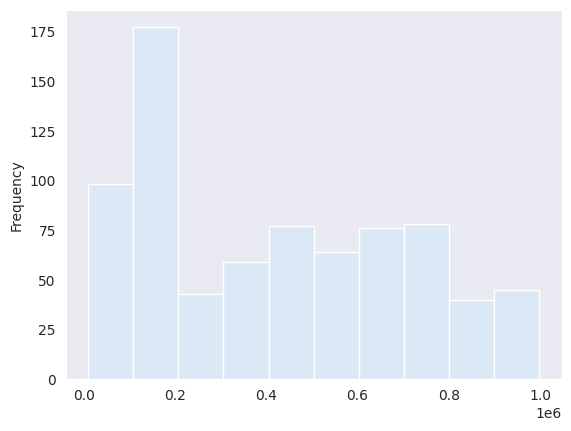

In [118]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()


<Figure size 640x480 with 0 Axes>

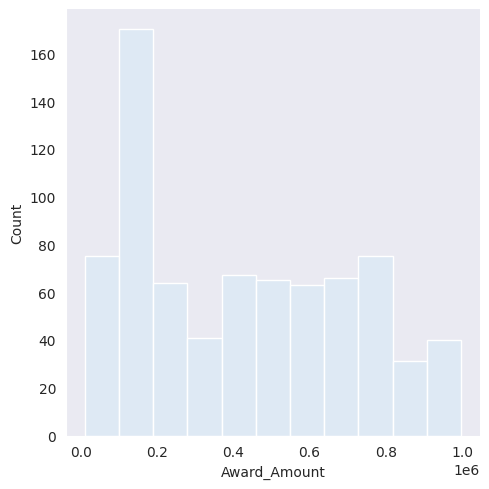

In [119]:
# Display a Seaborn displot
sns.displot(df['Award_Amount'])
plt.show()

# Clear the displot
plt.clf()


### Plot a histogram

The `displot()` function will return a histogram by default. The
`displot()` can also create a KDE or rug plot which are useful ways to
look at the data. Seaborn can also combine these plots so you can
perform more meaningful analysis.

**Instructions**

- Create a `displot` for the data.
- Explicitly pass in the number 20 for the number of bins in the
  histogram.
- Display the plot using `plt.show()`.

**Answer**


<Figure size 640x480 with 0 Axes>

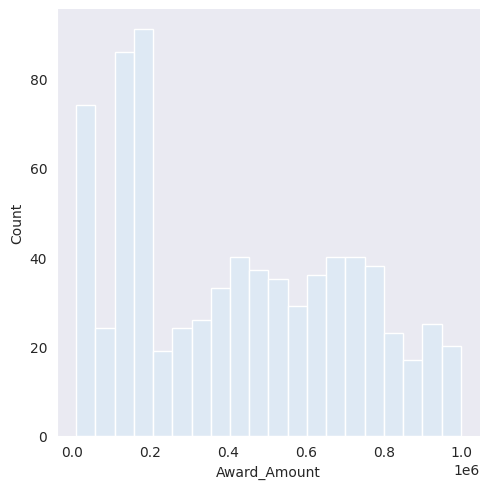

In [120]:
# Create a displot
sns.displot(df['Award_Amount'],
             bins=20)

# Display a plot
plt.show()


### Rug plot and kde shading

Now that you understand some function arguments for `displot()`, we can
continue further refining the output. This process of creating a
visualization and updating it in an incremental fashion is a useful and
common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

**Instructions**

- Create a `displot` of the `Award_Amount` column in the `df`.
- Configure it to show a shaded kde plot (using the `kind` and `fill`
  parameters).
- Add a rug plot above the x axis (using the `rug` parameter).
- Display the plot.

**Answer**


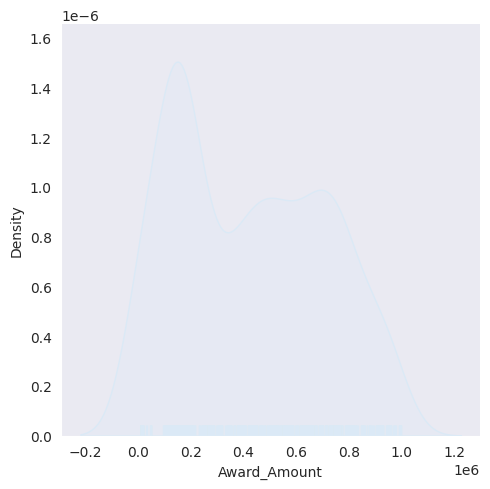

In [121]:
# Create a displot of the Award Amount
sns.displot(df['Award_Amount'],
             kind='kde',
             rug=True,
             fill=True)

# Plot the results
plt.show()


### Create a regression plot

For this set of exercises, we will be looking at FiveThirtyEight's data
on which US State has the worst drivers. The data set includes summary
level information about fatal accidents as well as insurance premiums
for each state as of 2010.

In this exercise, we will look at the difference between the regression
plotting functions.

**Instructions**

- The data is available in the dataframe called `df`.
- Create a regression plot using `regplot()` with `"insurance_losses"`
  on the x axis and `"premiums"` on the y axis.
- Create a regression plot of "premiums" versus "insurance_losses" using lmplot().
- Display the plot.

**Answer**


In [122]:
# added/edited
df = pd.read_csv("insurance_premiums.csv")

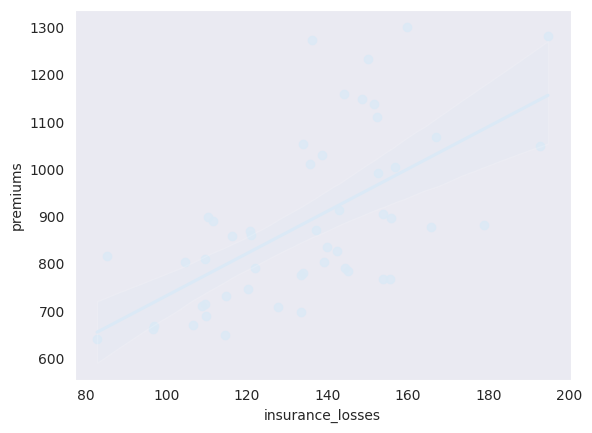

In [123]:
# Create a regression plot of premiums vs. insurance_losses
sns.regplot(data=df,
            x="insurance_losses",
            y="premiums")

# Display the plot
plt.show()


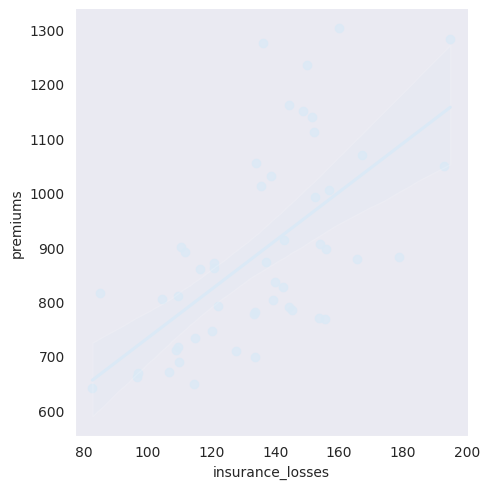

In [124]:
# Create an lmplot of premiums vs. insurance_losses
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums")

# Display the second plot
plt.show()


### Plotting multiple variables

Since we are using `lmplot()` now, we can look at the more complex
interactions of data. This data set includes geographic information by
state and area. It might be interesting to see if there is a difference
in relationships based on the `Region` of the country.

**Instructions**

- Use `lmplot()` to look at the relationship between `insurance_losses`
  and `premiums`.
- Plot a regression line for each `Region` of the country.

**Answer**


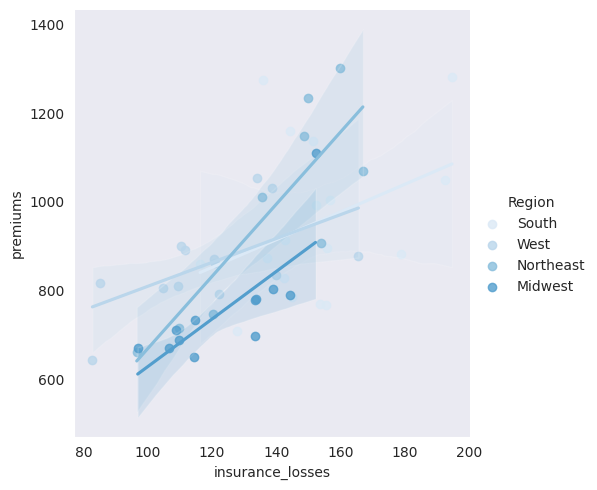

In [125]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

#Show the results
plt.show()


### Facetting multiple regressions

`lmplot()` allows us to facet the data across multiple rows and columns.
In the previous plot, the multiple lines were difficult to read in one
plot. We can try creating multiple plots by `Region` to see if that is a
more useful visualization.

**Instructions**

- Use `lmplot()` to look at the relationship between `insurance_losses`
  and `premiums`.
- Create a plot for each `Region` of the country.
- Display the plots across multiple rows.

**Answer**


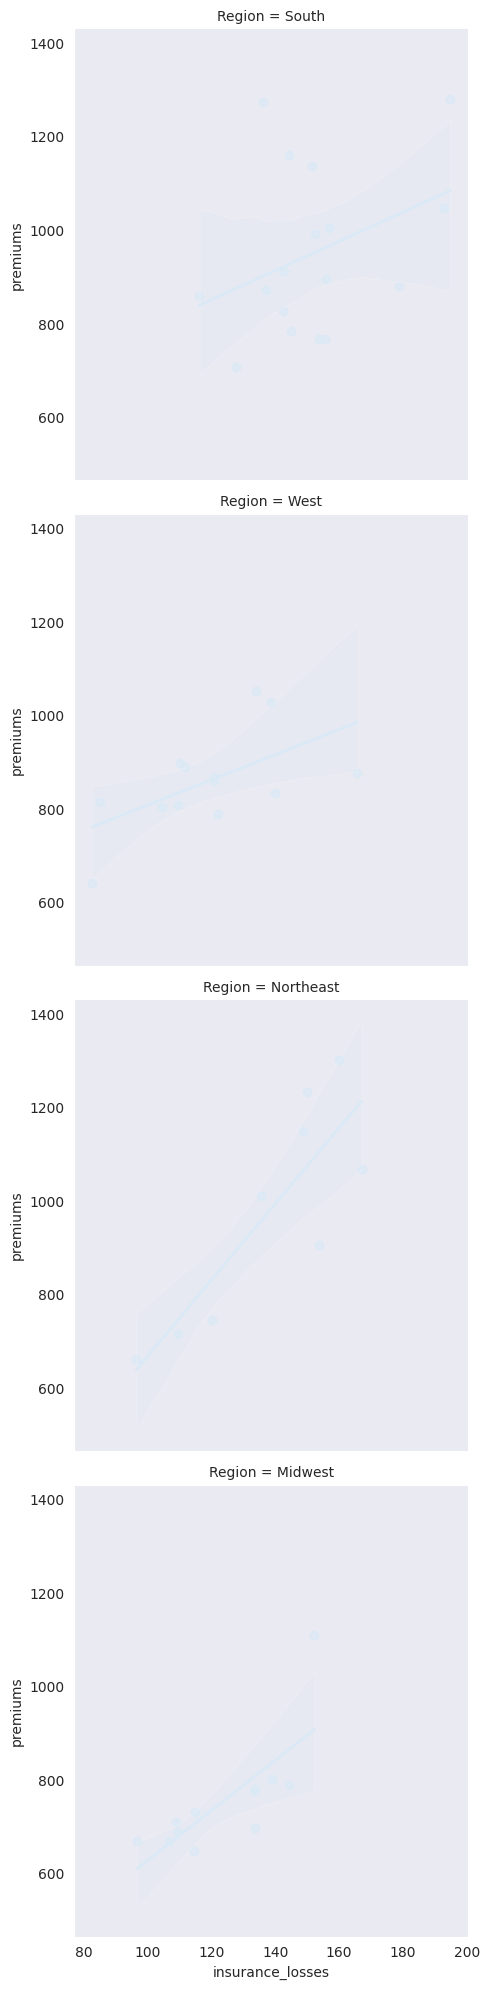

In [126]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()


## Customizing Seaborn Plots

### Setting the default style

For these exercises, we will be looking at fair market rent values
calculated by the US Housing and Urban Development Department. This data
is used to calculate guidelines for several federal programs. The actual
values for rents vary greatly across the US. We can use this data to get
some experience with configuring Seaborn plots.

All of the necessary imports for `seaborn`, `pandas` and `matplotlib`
have been completed. The data is stored in the `pandas` DataFrame `df`.

*By the way, if you haven't downloaded it already, check out the
[Seaborn Cheat
Sheet](https://datacamp-community-prod.s3.amazonaws.com/263130e2-2c92-4348-a356-9ed9b5034247).
It includes an overview of the most important concepts, functions and
methods and might come in handy if you ever need a quick refresher!*

**Instructions**

- Plot a `pandas` histogram without adjusting the style.
- Set Seaborn's default style.
- Create another `pandas` histogram of the `fmr_2` column which
  represents fair market rent for a 2-bedroom apartment.

**Answer**


In [127]:
# added/edited
df = pd.read_csv("FY18_4050_FMRs.csv")

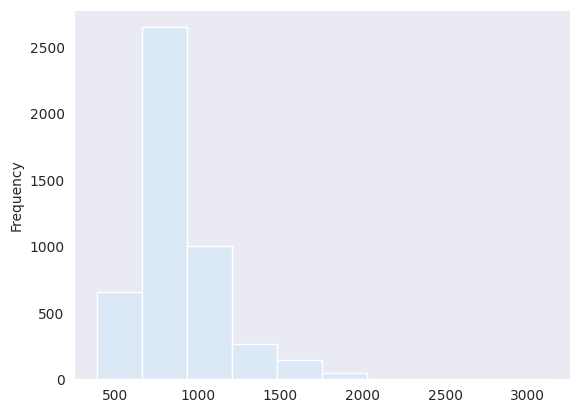

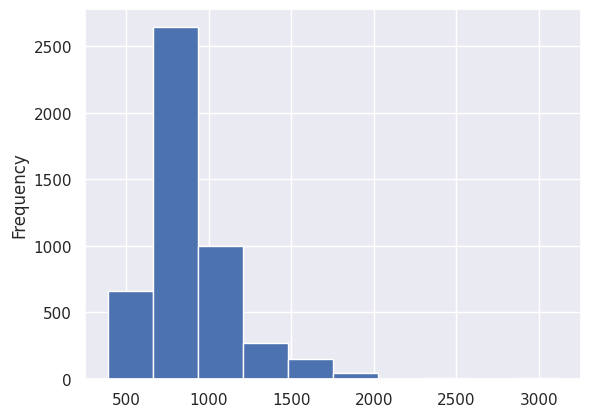

In [128]:
# Plot the pandas histogram
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

# Set the default seaborn style
sns.set()

# Plot the pandas histogram again
df['fmr_2'].plot.hist()
plt.show()
plt.clf()


### Comparing styles

Seaborn supports setting different styles that can control the
aesthetics of the final plot. In this exercise, you will plot the same
data in two different styles in order to see how the styles change the
output.

**Instructions**

Create a `displot()` of the `fmr_2` column in `df` using a `dark` style.
Use `plt.clf()` to clear the figure.

Create the same `displot()` of `fmr_2` using a `whitegrid` style. Clear
the plot after showing it.

**Answer**


<Figure size 640x480 with 0 Axes>

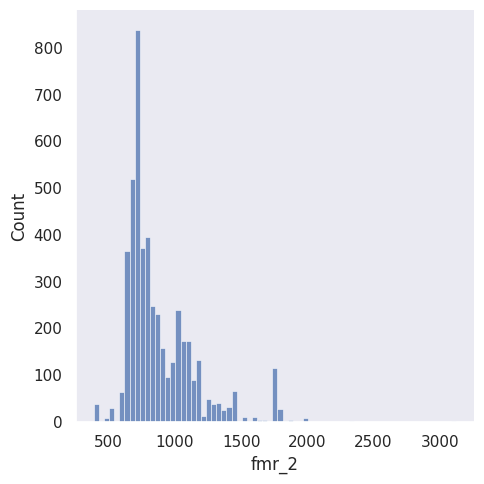

In [129]:
# Plot with a dark style
sns.set_style('dark')
sns.displot(df['fmr_2'])
plt.show()

# Clear the figure
plt.clf()


<Figure size 640x480 with 0 Axes>

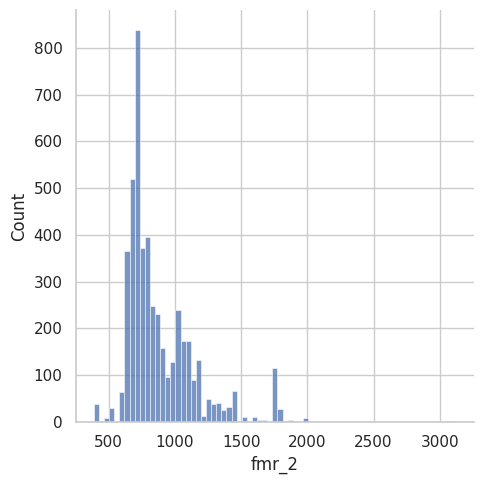

In [130]:
# Plot with a whitegrid style
sns.set_style('whitegrid')
sns.displot(df['fmr_2'])
plt.show()

# Clear the figure
plt.clf()


### Removing spines

In general, visualizations should minimize extraneous markings so that
the data speaks for itself. Seaborn allows you to remove the lines on
the top, bottom, left and right axis, which are often called spines.

**Instructions**

- Use a `white` style for the plot.
- Create a `lmplot()` comparing the `pop2010` and the `fmr_2` columns.
- Remove the top and right spines using `despine()`.

**Answer**


<Figure size 640x480 with 0 Axes>

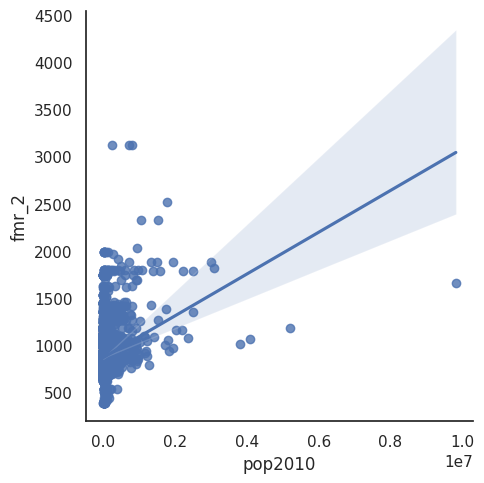

In [131]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine()

# Show the plot and clear the figure
plt.show()
plt.clf()


### Matplotlib color codes

Seaborn offers several options for modifying the colors of your
visualizations. The simplest approach is to explicitly state the color
of the plot. A quick way to change colors is to use the standard
`matplotlib` color codes.

**Instructions**

- Set the default Seaborn style and enable the `matplotlib` color codes.
- Create a `displot` for the `fmr_3` column using `matplotlib`'s magenta
  (`m`) color code.

**Answer**


<Figure size 640x480 with 0 Axes>

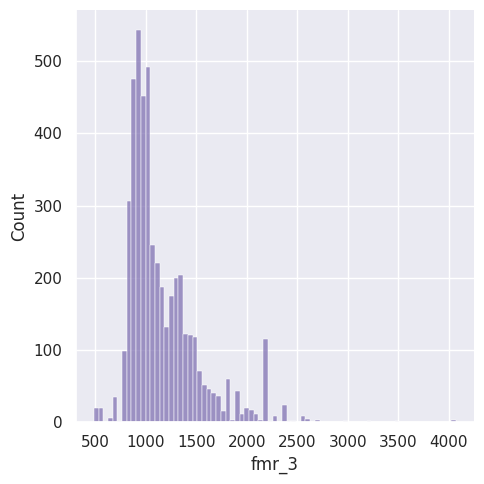

In [132]:
# Set style, enable color code, and create a magenta displot
sns.set(color_codes=True)
sns.displot(df['fmr_3'], color='m')

# Show the plot
plt.show()


### Using default palettes

Seaborn includes several default palettes that can be easily applied to
your plots. In this example, we will look at the impact of two different
palettes on the same `displot`.

**Instructions**

- Create a `for` loop to show the difference between the `bright` and
  `colorblind` palette.
- Set the palette using the `set_palette()` function.
- Use a `displot` of the `fmr_3` column.

**Answer**


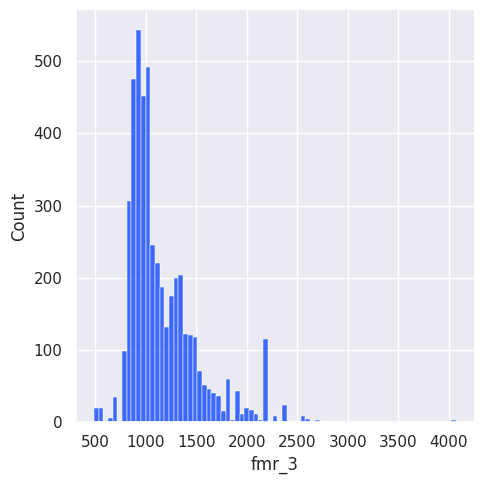

<Figure size 640x480 with 0 Axes>

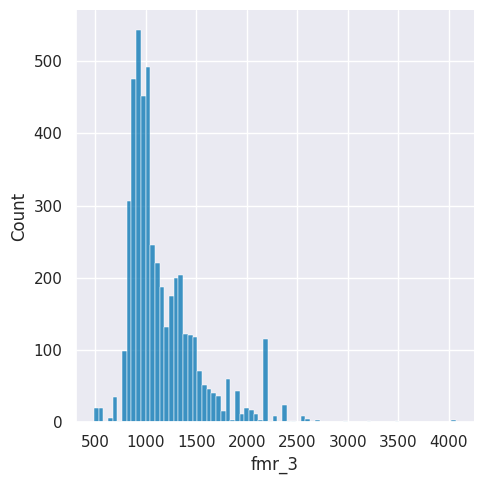

In [133]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.displot(df['fmr_3'])
    plt.show()

    # Clear the plots
    plt.clf()


### Creating Custom Palettes

Choosing a cohesive palette that works for your data can be time
consuming. Fortunately, Seaborn provides the `color_palette()` function
to create your own custom sequential, categorical, or diverging
palettes. Seaborn also makes it easy to view your palettes by using the
`palplot()` function.

In this exercise, you can experiment with creating different palettes.

**Instructions**

Create and display a `Purples` sequential palette containing 8 colors.

Create and display a palette with 10 colors using the `husl` system.

Create and display a diverging palette with 6 colors `coolwarm`.

**Answer**


<Figure size 640x480 with 0 Axes>

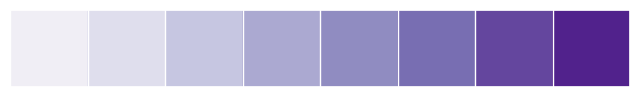

In [134]:
# Create the Purples palette
sns.palplot(sns.color_palette("Purples", 8))
plt.show()


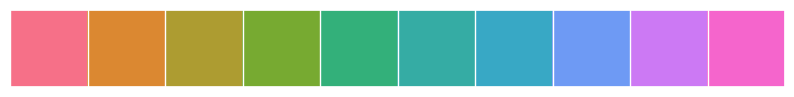

In [135]:
# Create the husl palette
sns.palplot(sns.color_palette("husl", 10))
plt.show()


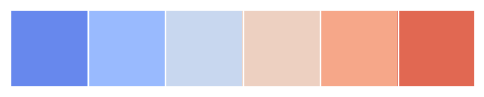

In [136]:
# Create the coolwarm palette
sns.palplot(sns.color_palette("coolwarm", 6))
plt.show()


### Using matplotlib axes

Seaborn uses `matplotlib` as the underlying library for creating plots.
Most of the time, you can use the Seaborn API to modify your
visualizations but sometimes it is helpful to use `matplotlib`'s
functions to customize your plots. The most important object in this
case is `matplotlib`'s `axes`.

Once you have an `axes` object, you can perform a lot of customization
of your plot.

In these examples, the US HUD data is loaded in the dataframe `df` and
all libraries are imported.

**Instructions**

- Use `plt.subplots()` to create a axes and figure objects.
- Plot a `histplot` of column `fmr_3` on the axes.
- Set a more useful label on the x axis of "3 Bedroom Fair Market Rent".

**Answer**


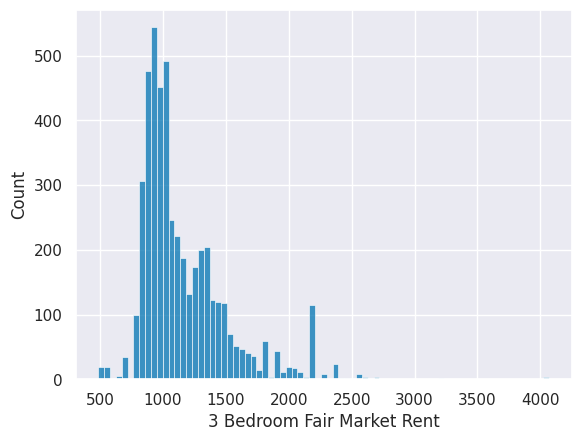

In [137]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.histplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()


### Additional plot customizations

The `matplotlib` API supports many common customizations such as
labeling axes, adding titles, and setting limits. Let's complete another
customization exercise.

**Instructions**

- Create a `histplot` of the `fmr_1` column.
- Modify the x axis label to say "1 Bedroom Fair Market Rent".
- Change the x axis limits to be between 100 and 1500.
- Add a descriptive title of `"US Rent"` to the plot.

**Answer**


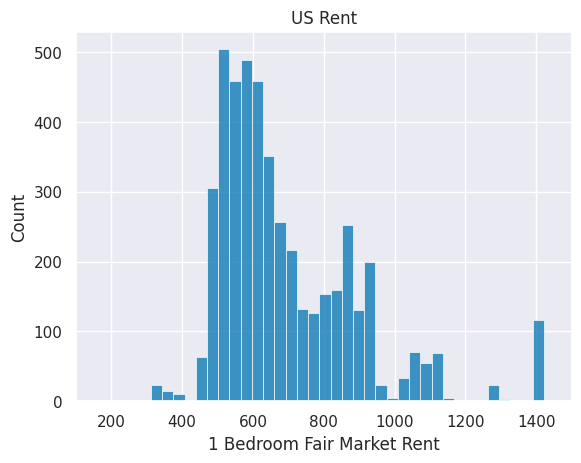

In [138]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.histplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()


### Adding annotations

Each of the enhancements we have covered can be combined together. In
the next exercise, we can annotate our distribution plot to include
lines that show the mean and median rent prices.

For this example, the palette has been changed to `bright` using
`sns.set_palette()`

**Instructions**

- Create a figure and axes.
- Plot the `fmr_1` column distribution.
- Add a vertical line using `axvline` for the `median` and `mean` of the
  values which are already defined.

**Answer**


In [139]:
# added/edited
import numpy as np
median = np.median(df['fmr_1'])
mean = np.mean(df['fmr_1'])

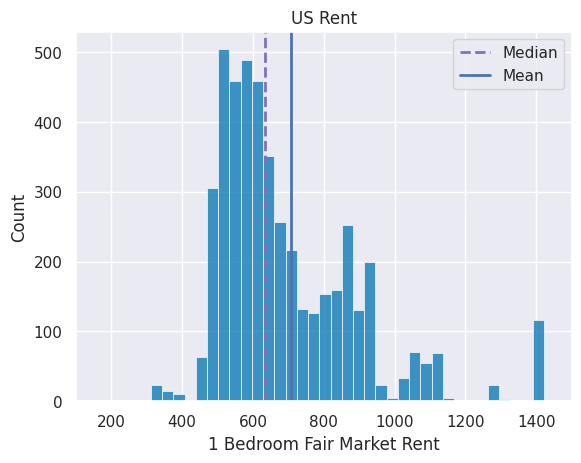

In [140]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.show()


### Multiple plots

For the final exercise we will plot a comparison of the fair market
rents for 1-bedroom and 2-bedroom apartments.

**Instructions**

- Create two axes objects, `ax0` and `ax1`.
- Plot `fmr_1` on `ax0` and `fmr_2` on `ax1`.
- Display the plots side by side.

**Answer**


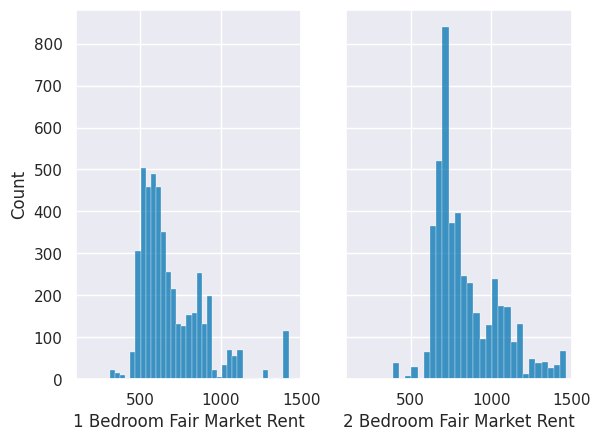

In [141]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.histplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.histplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()


## Additional Plot Types

### stripplot() and swarmplot()

Many datasets have categorical data and Seaborn supports several useful
plot types for this data. In this example, we will continue to look at
the 2010 School Improvement data and segment the data by the types of
school improvement models used.

As a refresher, here is the KDE distribution of the Award Amounts:

<img
src="tuition_kde_plot.png"
width="300" />

While this plot is useful, there is a lot more we can learn by looking
at the individual `Award_Amount` and how the amounts are distributed
among the four categories.

**Instructions**

- Create a `stripplot` of the `Award_Amount` with the `Model Selected`
  on the y axis with `jitter` enabled.
- Create a `swarmplot()` of the same data, but also include the `hue` by `Region`.

**Answer**


In [142]:
# added/edited
df = pd.read_csv("schoolimprovement2010grants.csv")

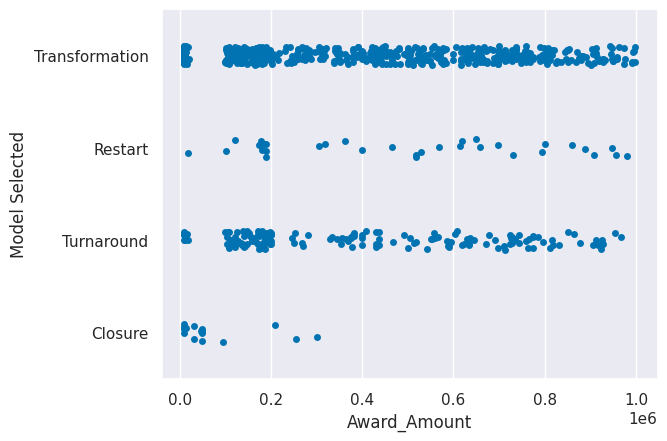

In [143]:
# Create the stripplot
sns.stripplot(data=df,
              x='Award_Amount',
              y='Model Selected',
              jitter=True)

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


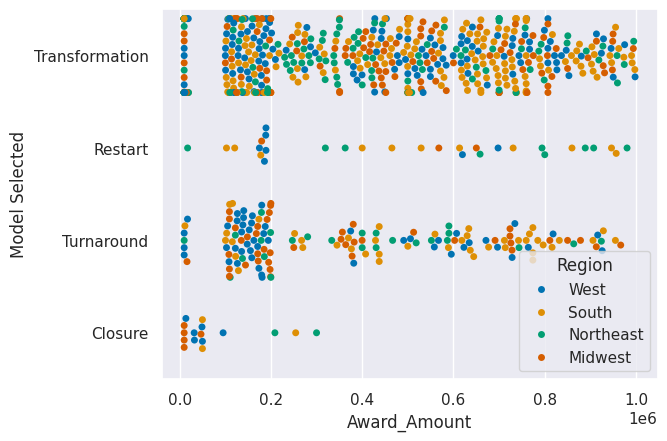

In [144]:
# Create and display a swarmplot with hue set to the Region
sns.swarmplot(data=df,
              x='Award_Amount',
              y='Model Selected',
              hue='Region')

plt.show()


### boxplots, violinplots and boxenplots

Seaborn's categorical plots also support several abstract
representations of data. The API for each of these is the same so it is
very convenient to try each plot and see if the data lends itself to one
over the other.

In this exercise, we will use the color palette options presented in
Chapter 2 to show how colors can easily be included in the plots.

**Instructions**

- Create and display a `boxplot` of the data with `Award_Amount` on the
  x axis and `Model Selected` on the y axis.
- Create and display a similar `violinplot` of the data, but use the `husl` palette for colors.
- Use `Award_Amount` on the x axis and `Model Selected` on the y axis.
- Create and display an `boxenplot` using the `Paired` palette and the `Region` column as the `hue`.

**Answer**


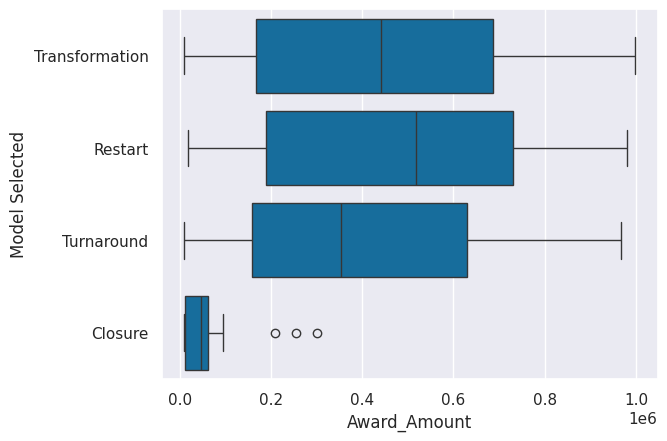

In [145]:
# Create a boxplot
sns.boxplot(data=df,
            x='Award_Amount',
            y='Model Selected')

plt.show()
plt.clf()


<ipython-input-146-12a00887e5da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


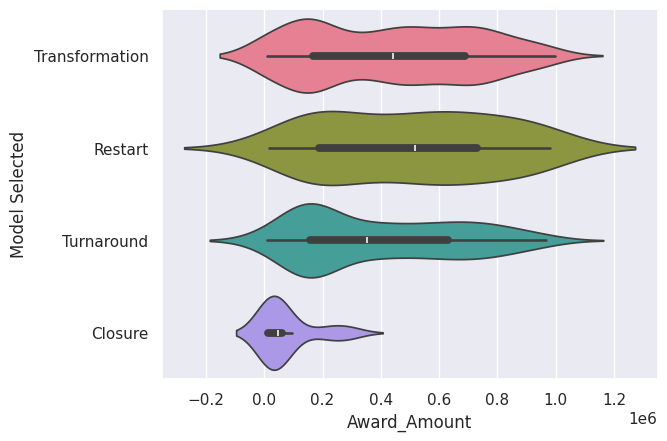

In [146]:
# Create a violinplot with the husl palette
sns.violinplot(data=df,
               x='Award_Amount',
               y='Model Selected',
               palette='husl')

plt.show()
plt.clf()


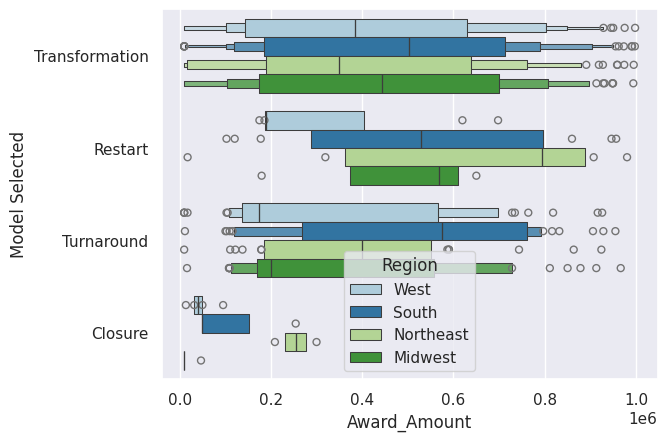

In [147]:
# Create a boxenplot with the Paired palette and the Region column as the hue
sns.boxenplot(data=df,
           x='Award_Amount',
           y='Model Selected',
           palette='Paired',
           hue='Region')

plt.show()
plt.clf()


### barplots, pointplots and countplots

The final group of categorical plots are `barplots`, `pointplots` and
`countplot` which create statistical summaries of the data. The plots
follow a similar API as the other plots and allow further customization
for the specific problem at hand.

**Instructions**

- Create a `countplot` with the `df` dataframe and `Model Selected` on
  the y axis and the color varying by `Region`.
- Create a `pointplot` with the df dataframe and `Model Selected` on the x-axis and `Award_Amount` on the y-axis.
- Use a `capsize` in the `pointplot` in order to add caps to the error bars.
- Create a `barplot` with the same data on the x and y axis and change the color of each bar based on the `Region` column.

**Answer**


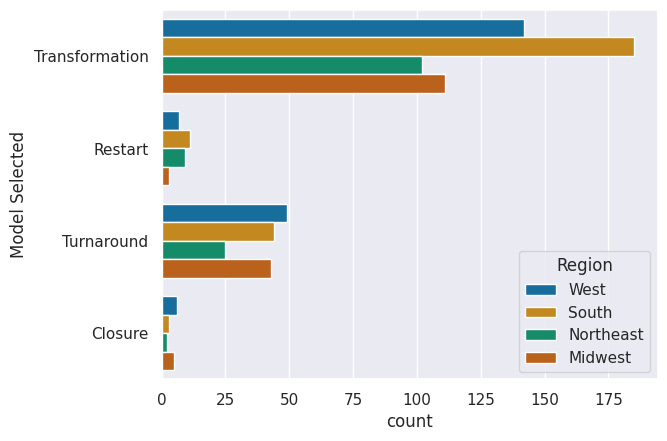

In [148]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=df,
              y="Model Selected",
              hue="Region")

plt.show()
plt.clf()


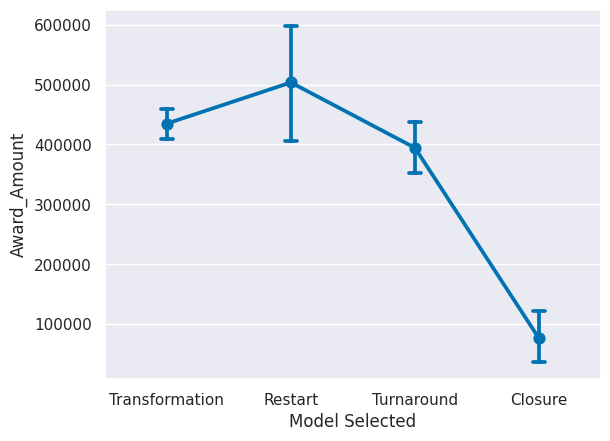

In [149]:
# Create a pointplot and include the capsize in order to show caps on the error bars
sns.pointplot(data=df,
              y='Award_Amount',
              x='Model Selected',
              capsize=.1)

plt.show()
plt.clf()


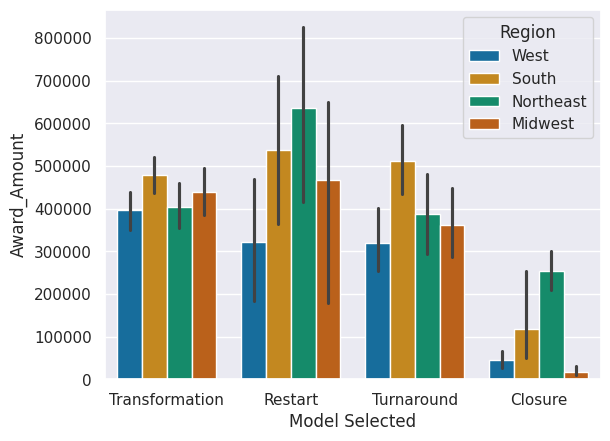

In [150]:
# Create a barplot with each Region shown as a different color
sns.barplot(data=df,
            y='Award_Amount',
            x='Model Selected',
            hue='Region')

plt.show()
plt.clf()


### Regression and residual plots

Linear regression is a useful tool for understanding the relationship
between numerical variables. Seaborn has simple but powerful tools for
examining these relationships.

For these exercises, we will look at some details from the US Department
of Education on 4 year college tuition information and see if there are
any interesting insights into which variables might help predict tuition
costs.

For these exercises, all data is loaded in the `df` variable.

**Instructions**

- Plot a regression plot comparing `Tuition` and average SAT
  scores(`SAT_AVG_ALL`).
- Make sure the values are shown as green triangles.
- Use a residual plot to determine if the relationship looks linear.

**Answer**


In [151]:
# added/edited
df = pd.read_csv("college_datav3.csv")

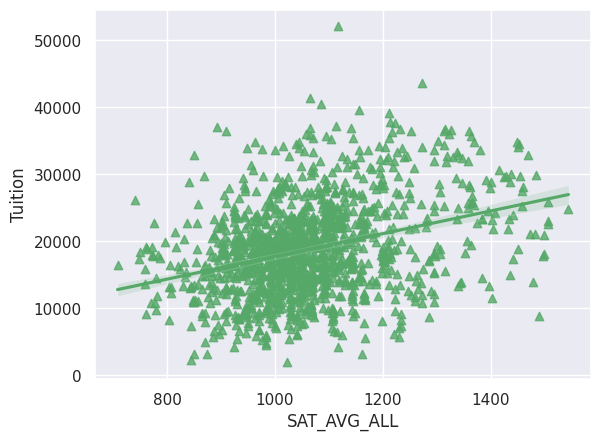

In [152]:
# Display a regression plot for Tuition
sns.regplot(data=df,
            y='Tuition',
            x='SAT_AVG_ALL',
            marker='^',
            color='g')

plt.show()
plt.clf()


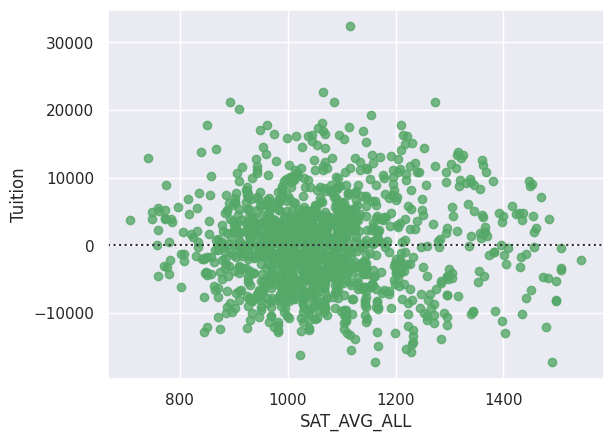

In [153]:
# Display the residual plot
sns.residplot(data=df,
              y='Tuition',
              x='SAT_AVG_ALL',
              color='g')

plt.show()
plt.clf()


### Regression plot parameters

Seaborn's regression plot supports several parameters that can be used
to configure the plots and drive more insight into the data.

For the next exercise, we can look at the relationship between tuition
and the percent of students that receive Pell grants. A Pell grant is
based on student financial need and subsidized by the US Government. In
this data set, each University has some percentage of students that
receive these grants. Since this data is continuous, using `x_bins` can
be useful to break the percentages into categories in order to summarize
and understand the data.

**Instructions**

- Plot a regression plot of `Tuition` and `PCTPELL`.
- Create another plot that breaks the `PCTPELL` column into 5 different bins.
- Create a final regression plot that includes a 2nd `order` polynomial regression line.

**Answer**


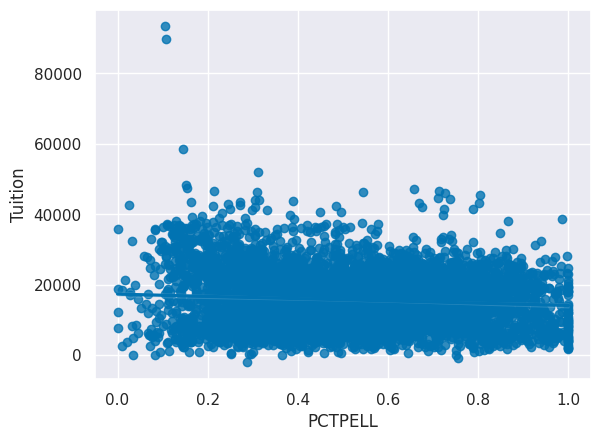

In [154]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL')

plt.show()
plt.clf()


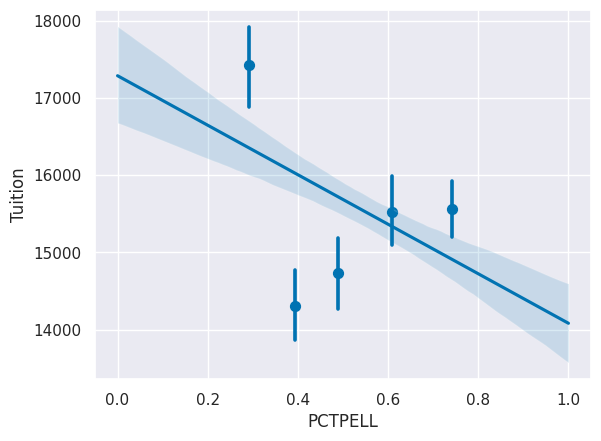

In [155]:
# Create another plot that estimates the tuition by region
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL',
            x_bins=5)

plt.show()
plt.clf()


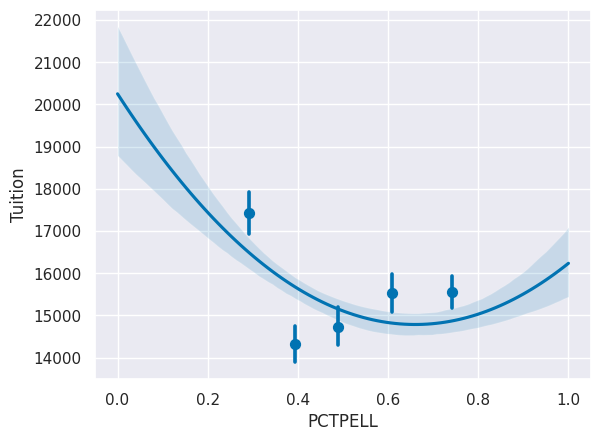

In [156]:
# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df,
            y='Tuition',
            x='PCTPELL',
            x_bins=5,
            order=2)

plt.show()
plt.clf()


### Binning data

When the data on the x axis is a continuous value, it can be useful to
break it into different bins in order to get a better visualization of
the changes in the data.

For this exercise, we will look at the relationship between tuition and
the Undergraduate population abbreviated as `UG` in this data. We will
start by looking at a scatter plot of the data and examining the impact
of different bin sizes on the visualization.

**Instructions**

- Create a `regplot` of `Tuition` and `UG` and set the `fit_reg`
  parameter to `False` to disable the regression line.
- Create another plot with the `UG` data divided into 5 bins.
- Create a `regplot()` with the data divided into 8 bins.

**Answer**


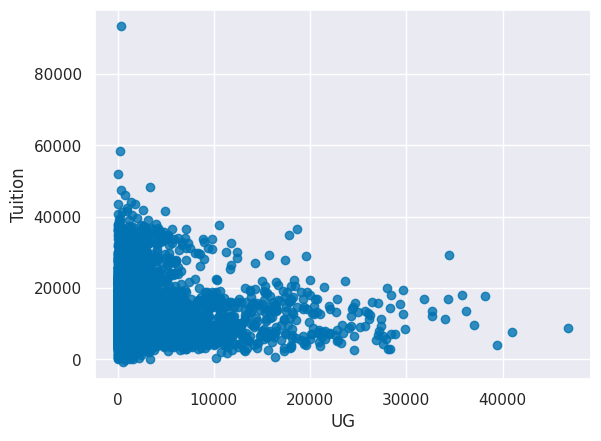

In [157]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df,
            y='Tuition',
            x='UG',
            fit_reg=False)

plt.show()
plt.clf()


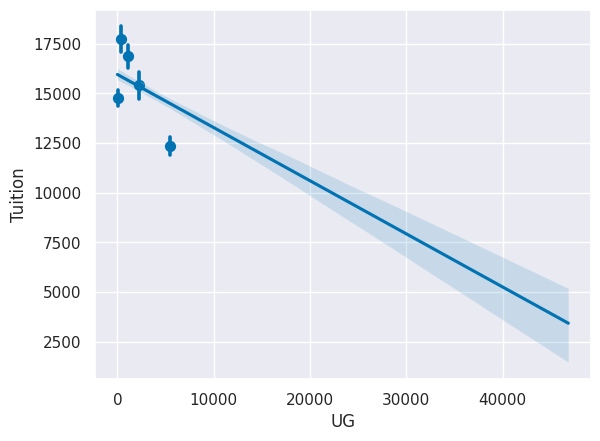

In [158]:
# Create a scatter plot and bin the data into 5 bins
sns.regplot(data=df,
            y='Tuition',
            x='UG',
            x_bins=5)

plt.show()
plt.clf()


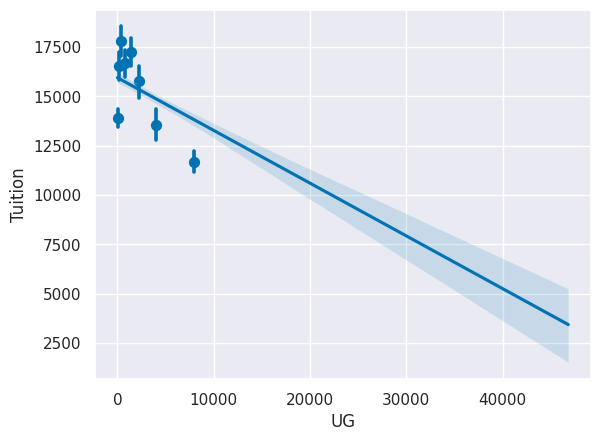

In [159]:
# Create a regplot and bin the data into 8 bins
sns.regplot(data=df,
            y='Tuition',
            x='UG',
            x_bins=8)

plt.show()
plt.clf()


### Creating heatmaps

A heatmap is a common matrix plot that can be used to graphically
summarize the relationship between two variables. For this exercise, we
will start by looking at guests of the Daily Show from 1999 - 2015 and
see how the occupations of the guests have changed over time.

The data includes the date of each guest appearance as well as their
occupation. For the first exercise, we need to get the data into the
right format for Seaborn's `heatmap` function to correctly plot the
data. All of the data has already been read into the `df` variable.

**Instructions**

- Use pandas' `crosstab()` function to build a table of visits by
  `Group` and `Year`.
- Print the `pd_crosstab` DataFrame.
- Plot the data using Seaborn's `heatmap()`.

**Answer**


In [160]:
# added/edited
df = pd.read_csv("daily_show_guests_cleaned.csv")

YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

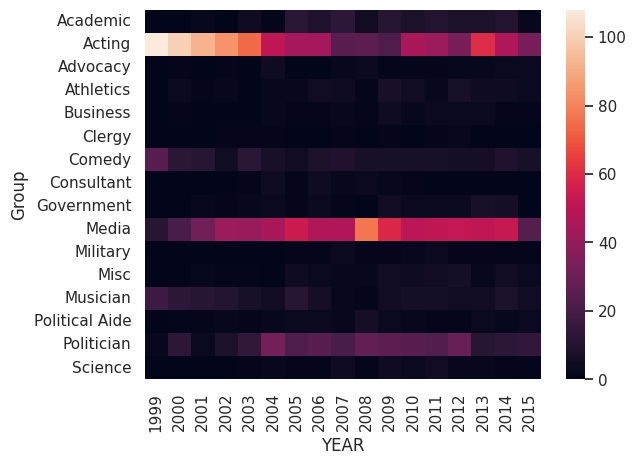

In [161]:
# Create a crosstab table of the data and print it
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table
sns.heatmap(pd_crosstab)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


### Customizing heatmaps

Seaborn supports several types of additional customizations to improve
the output of a heatmap. For this exercise, we will continue to use the
Daily Show data that is stored in the `df` variable but we will
customize the output.

**Instructions**

- Create a crosstab table of `Group` and `YEAR`
- Create a heatmap of the data using the `BuGn` palette
- Disable the `cbar` and increase the `linewidth` to 0.3

**Answer**


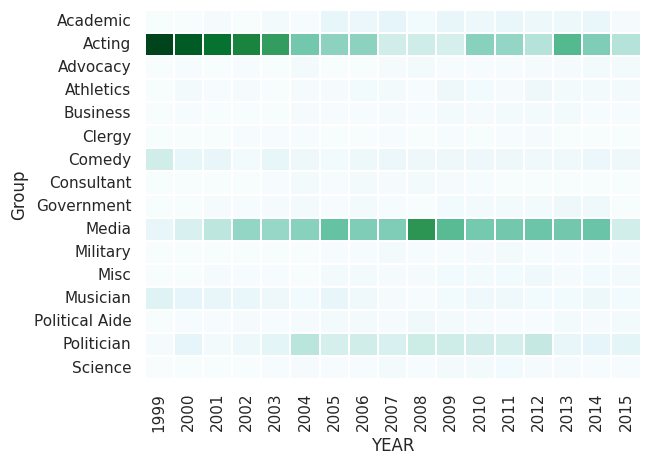

In [162]:
# Create the crosstab DataFrame
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])

# Plot a heatmap of the table
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()
plt.clf()


## Creating Plots on Data Aware Grids

### Building a FacetGrid

Seaborn's `FacetGrid` is the foundation for building data-aware grids. A
data-aware grid allows you to create a series of small plots that can be
useful for understanding complex data relationships.

For these exercises, we will continue to look at the College Scorecard
Data from the US Department of Education. This rich dataset has many
interesting data elements that we can plot with Seaborn.

When building a `FacetGrid`, there are two steps:

- Create a `FacetGrid` object with columns, rows, or hue.
- Map individual plots to the grid.

**Instructions**

- Create a `FacetGrid` that shows a point plot of the Average SAT scores
  `SAT_AVG_ALL`.
- Use `row_order` to control the display order of the degree types.

**Answer**


In [163]:
# added/edited
df = pd.read_csv("college_datav3.csv")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 640x480 with 0 Axes>

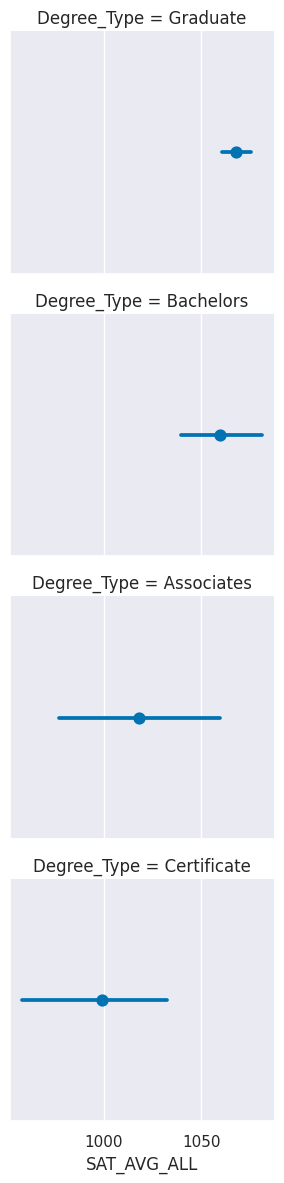

In [164]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df,
                   row="Degree_Type",
                   row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()


### Using a catplot

In many cases, Seaborn's `catplot()` can be a simpler way to create a
`FacetGrid.` Instead of creating a grid and mapping the plot, we can use
the `catplot()` to create a plot with one line of code.

For this exercise, we will recreate one of the plots from the previous
exercise using `catplot()` and show how to create a `boxplot` on a
data-aware grid.

**Instructions**

- Create a `catplot()` that contains a boxplot (`box`) of `Tuition`
  values varying by `Degree_Type` across rows.
- Create a `catplot()` of SAT Averages (`SAT_AVG_ALL`) facetted across `Degree_Type` that shows a pointplot (`point`).
- Use `row_order` to order the degrees from highest to lowest level.

**Answer**


<Figure size 640x480 with 0 Axes>

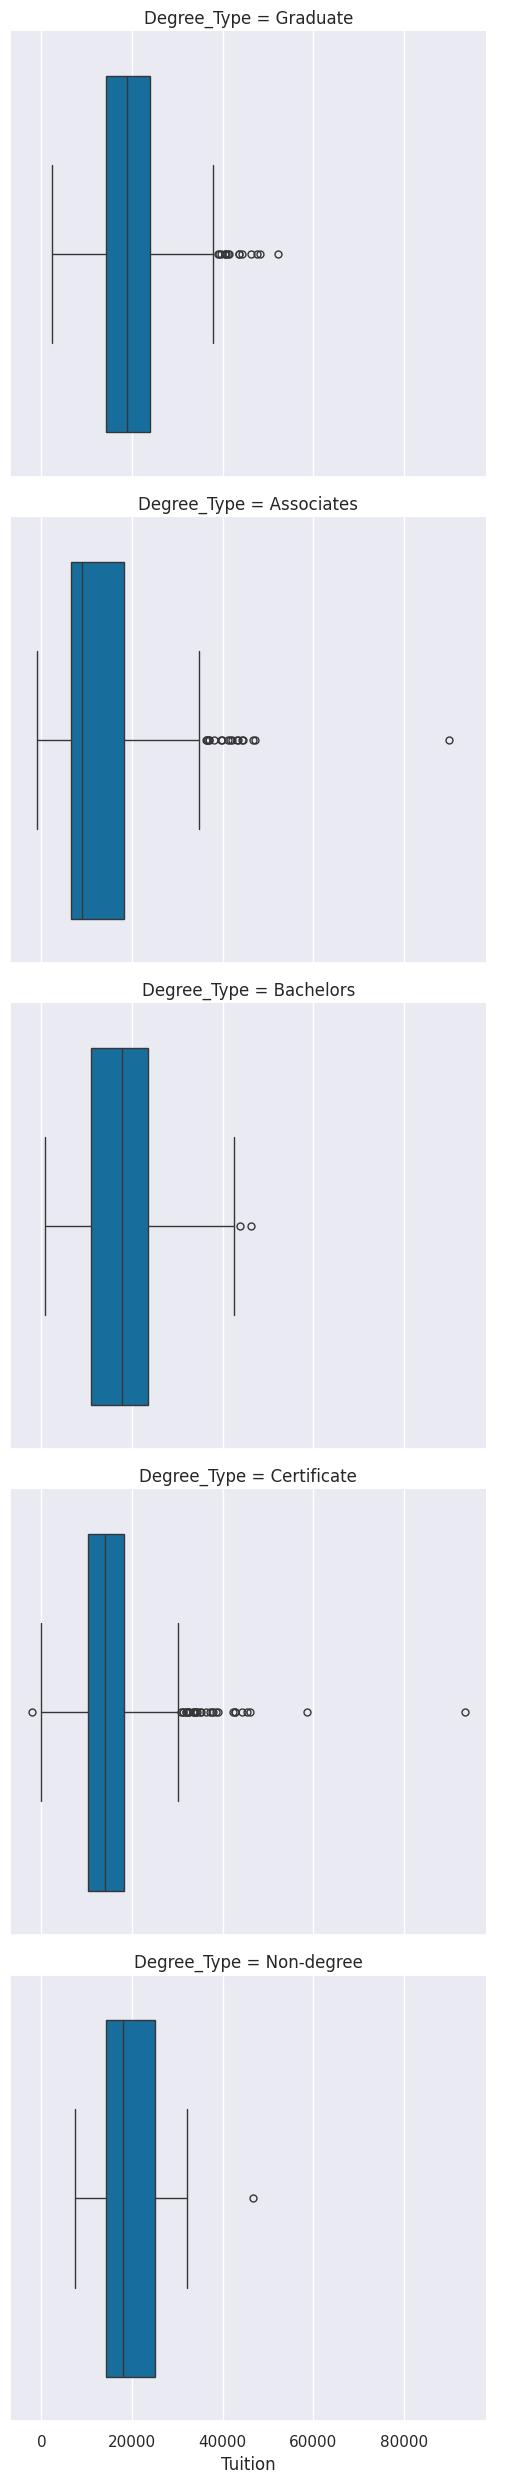

In [165]:
# Create a factor plot that contains boxplots of Tuition values
sns.catplot(data=df,
               x='Tuition',
               kind='box',
               row='Degree_Type')

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

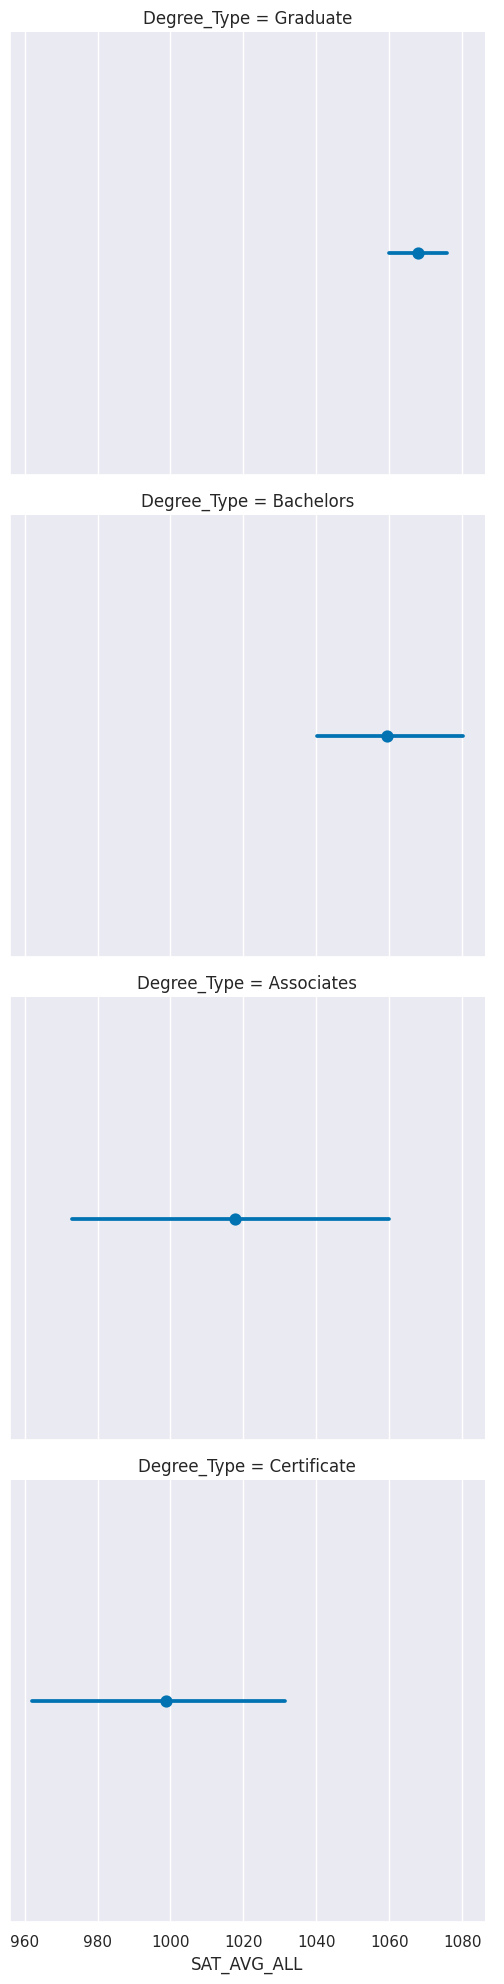

In [166]:
# Create a facetted pointplot of Average SAT scores facetted by Degree Type
sns.catplot(data=df,
               x='SAT_AVG_ALL',
               kind='point',
               row='Degree_Type',
               row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()


### Using a lmplot

The `lmplot` is used to plot scatter plots with regression lines on
FacetGrid objects. The API is similar to `catplot` with the difference
that the default behavior of `lmplot` is to plot regression lines.

For the first set of exercises, we will look at the Undergraduate
population (`UG`) and compare it to the percentage of students receiving
Pell Grants (`PCTPELL`).

For the second `lmplot` exercise, we can look at the relationships
between Average SAT scores and Tuition across the different degree types
and public vs. non-profit schools.

**Instructions**

- Create a `FacetGrid()` with `Degree_Type` columns and scatter plot of
  `UG` and `PCTPELL`.
- Create a `lmplot()` using the same values from the `FacetGrid()`.
- Create a facetted `lmplot()` comparing `SAT_AVG_ALL` to `Tuition` with columns varying by `Ownership` and rows by `Degree_Type`.
- In the `lmplot()` add a `hue` for Women Only Universities.

**Answer**


In [167]:
# added/edited
df = pd.read_csv("college_datav3.csv")
degree_ord = ["Graduate", "Bachelors", "Associates"]
inst_ord = ["Public", "Private non-profit"]

<Figure size 640x480 with 0 Axes>

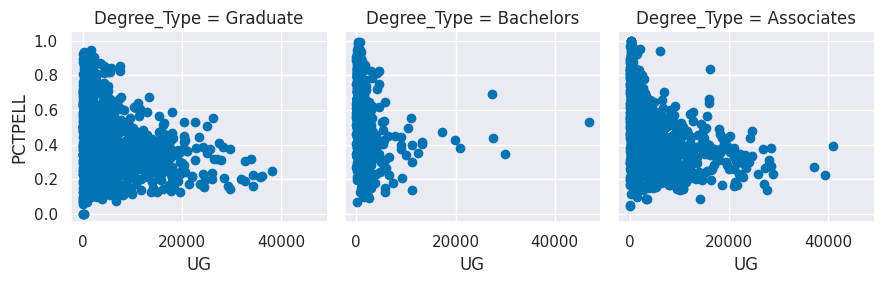

In [168]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=degree_ord)

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

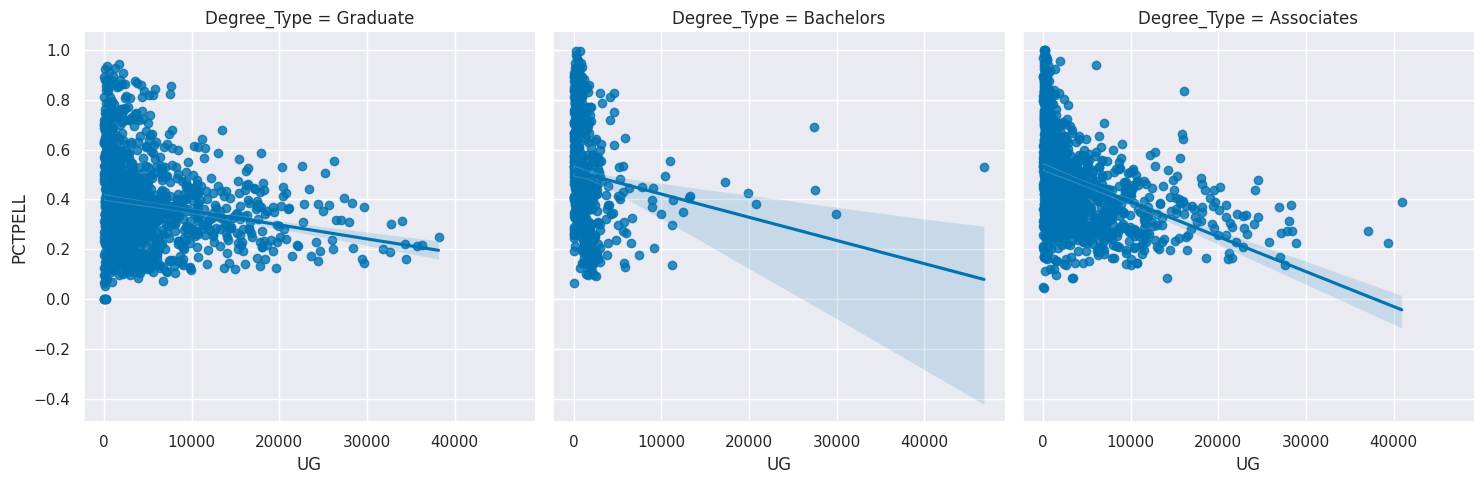

In [169]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
           x='UG',
           y='PCTPELL',
           col="Degree_Type",
           col_order=degree_ord)

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

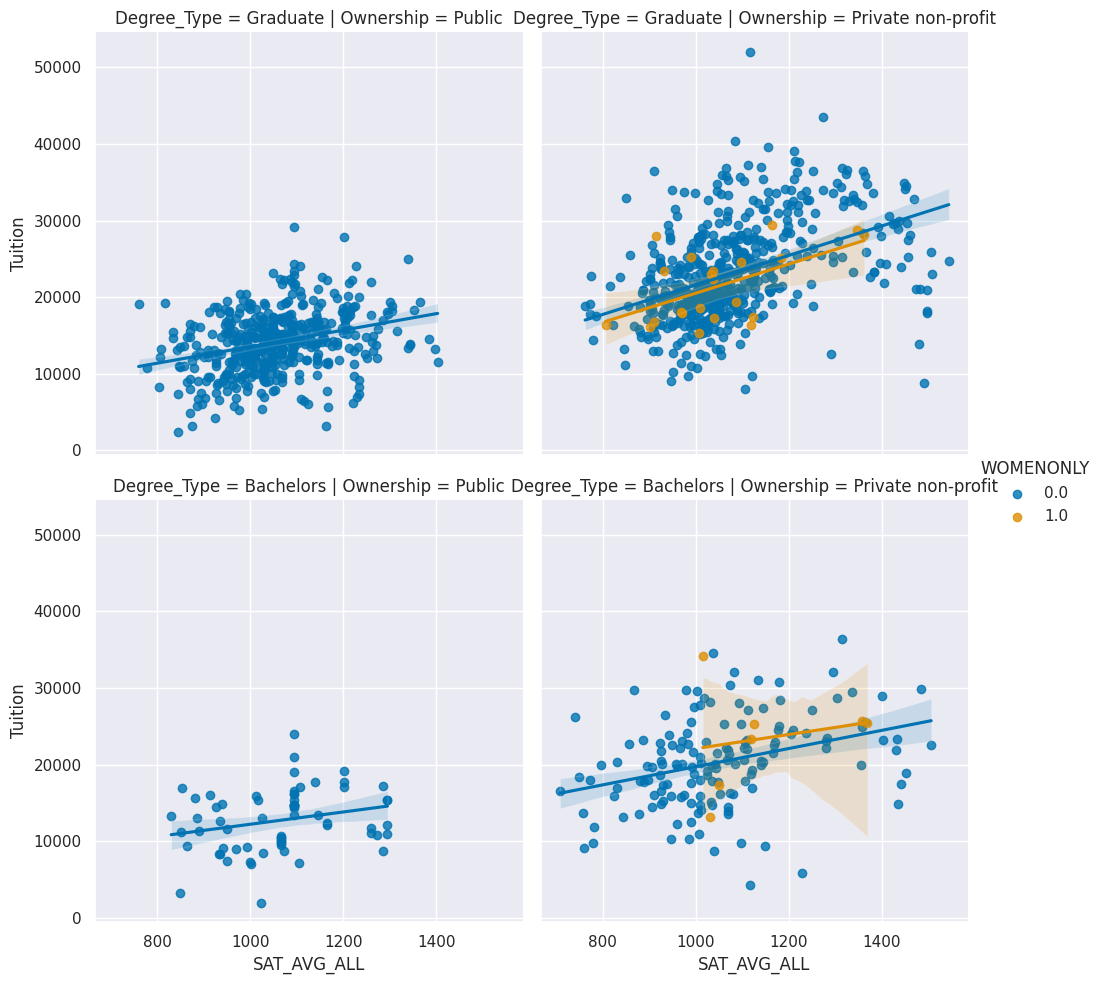

In [170]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type
# and hue based on the WOMENONLY column and columns defined by inst_order
sns.lmplot(data=df,
           x='SAT_AVG_ALL',
           y='Tuition',
           col="Ownership",
           row='Degree_Type',
           row_order=['Graduate', 'Bachelors'],
           hue='WOMENONLY',
           col_order=inst_ord)

plt.show()
plt.clf()


### Building a PairGrid

When exploring a dataset, one of the earliest tasks is exploring the
relationship between pairs of variables. This step is normally a
precursor to additional investigation.

Seaborn supports this pair-wise analysis using the `PairGrid`. In this
exercise, we will look at the Car Insurance Premium data we analyzed in
Chapter 1. All data is available in the `df` variable.

**Instructions**

- Compare `"fatal_collisions"` to `"premiums"` by using a scatter plot
  mapped to a `PairGrid()`.
- Create another `PairGrid` but plot a histogram on the diagonal and scatter plot on the off diagonal.

**Answer**


In [171]:
# added/edited
df = pd.read_csv("insurance_premiums.csv")

<Figure size 640x480 with 0 Axes>

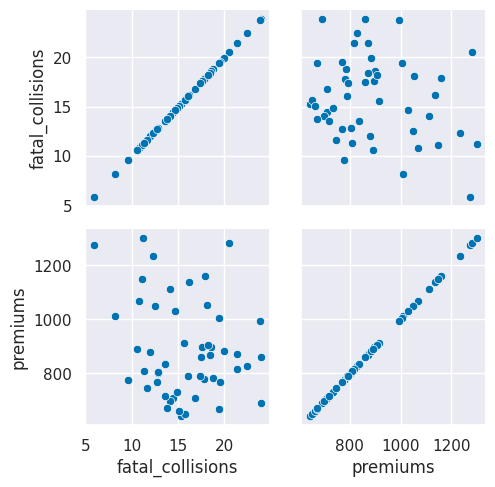

In [172]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(sns.scatterplot)

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

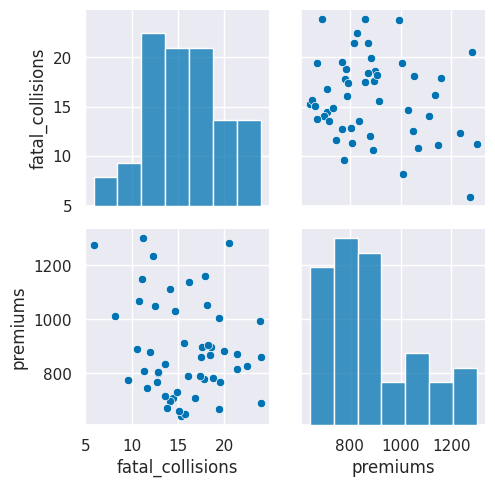

In [173]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(sns.histplot)
g3 = g2.map_offdiag(sns.scatterplot)

plt.show()
plt.clf()


### Using a pairplot

The `pairplot()` function is generally a more convenient way to look at
pairwise relationships. In this exercise, we will create the same
results as the `PairGrid` using less code. Then, we will explore some
additional functionality of the `pairplot()`. We will also use a
different palette and adjust the transparency of the diagonal plots
using the `alpha` parameter.

**Instructions**

- Recreate the pairwise plot from the previous exercise using
  `pairplot()`.
- Create another pairplot using the `"Region"` to color code the results.
- Use the `RdBu` palette to change the colors of the plot.

**Answer**


<Figure size 640x480 with 0 Axes>

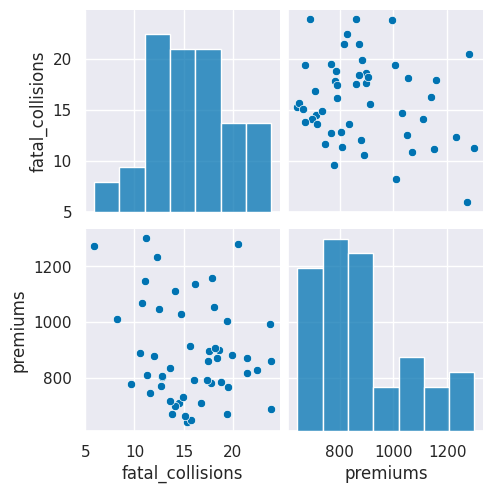

In [174]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter')

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

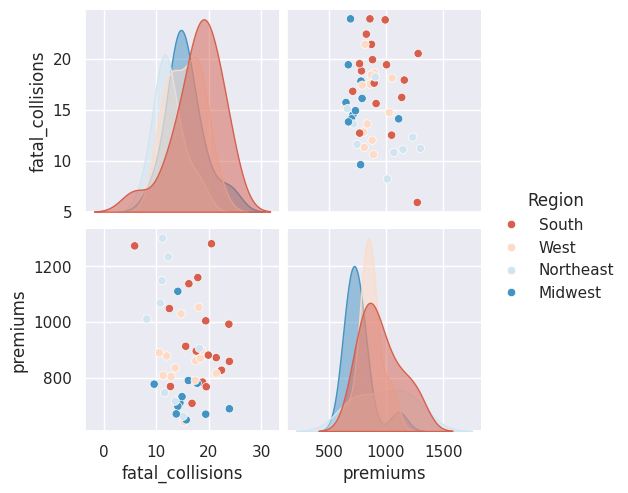

In [175]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
             vars=["fatal_collisions", "premiums"],
             kind='scatter',
             hue='Region',
             palette='RdBu',
             diag_kws={'alpha':.5})

plt.show()
plt.clf()


### Additional pairplots

This exercise will go through a couple of more examples of how the
`pairplot()` can be customized for quickly analyzing data and
determining areas of interest that might be worthy of additional
analysis.

One area of customization that is useful is to explicitly define the
`x_vars` and `y_vars` that you wish to examine. Instead of examining all
pairwise relationships, this capability allows you to look only at the
specific interactions that may be of interest.

We have already looked at using `kind` to control the types of plots. We
can also use `diag_kind` to control the types of plots shown on the
diagonals. In the final example, we will include a regression and kde
plot in the `pairplot`.

**Instructions**

- Create a pair plot that examines `fatal_collisions_speeding` and
  `fatal_collisions_alc` on the x axis and `premiums` and
  `insurance_losses` on the y axis.
- Use the `husl` palette and color code the scatter plot by `Region`.
- Build a `pairplot()` with kde plots along the diagonals. Include the `insurance_losses` and `premiums` as the variables.
- Use a `reg` plot for the the non-diagonal plots.
- Use the `BrBG` palette for the final plot.

**Answer**


<Figure size 640x480 with 0 Axes>

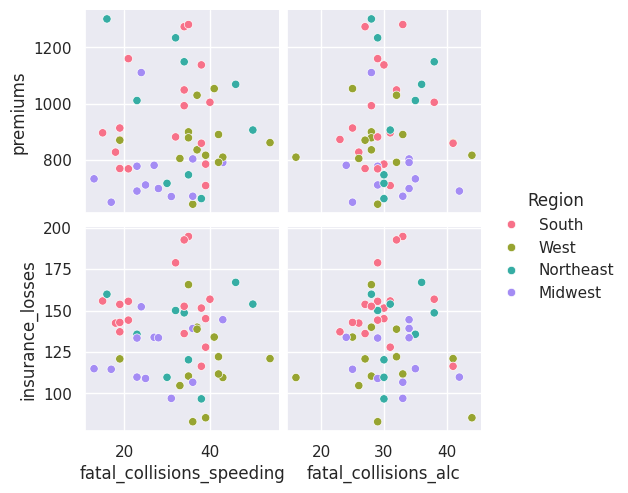

In [176]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
             x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
             y_vars=['premiums', 'insurance_losses'],
             kind='scatter',
             hue='Region',
             palette='husl')

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

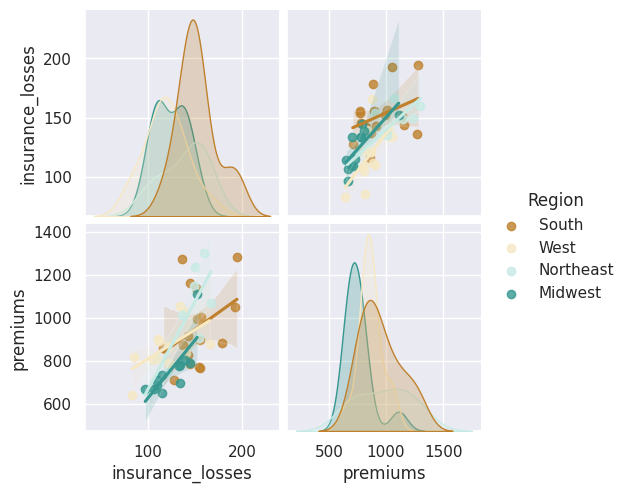

In [177]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()


### Building a JointGrid and jointplot

Seaborn's `JointGrid` combines univariate plots such as histograms, rug
plots and kde plots with bivariate plots such as scatter and regression
plots. The process for creating these plots should be familiar to you
now. These plots also demonstrate how Seaborn provides convenient
functions to combine multiple plots together.

For these exercises, we will use the bike share data that we reviewed
earlier. In this exercise, we will look at the relationship between
humidity levels and total rentals to see if there is an interesting
relationship we might want to explore later.

**Instructions**

- Use Seaborn's "whitegrid" style for these plots.
- Create a `JointGrid()` with "hum" on the x-axis and "total_rentals" on
  the y.
- Plot a `regplot()` and `histplot()` on the margins.
- Re-create the plot using a `jointplot()`.

**Answer**


In [178]:
# added/edited
df = pd.read_csv("bike_share.csv")

<Figure size 640x480 with 0 Axes>

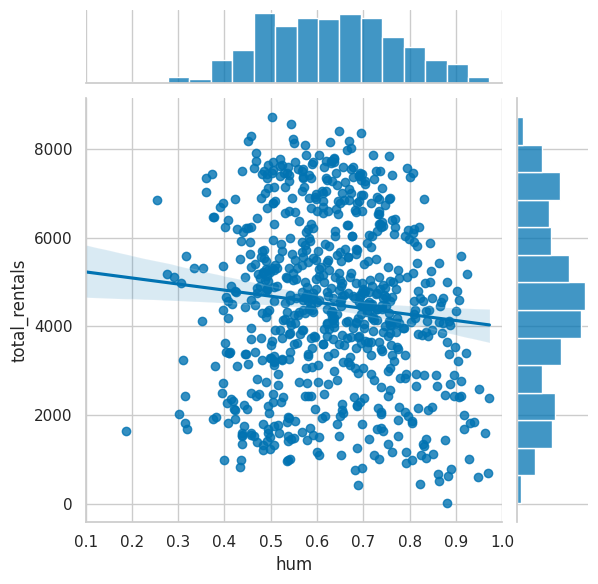

In [179]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
                  y="total_rentals",
                  data=df,
                  xlim=(0.1, 1.0))

g.plot(sns.regplot, sns.histplot)

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

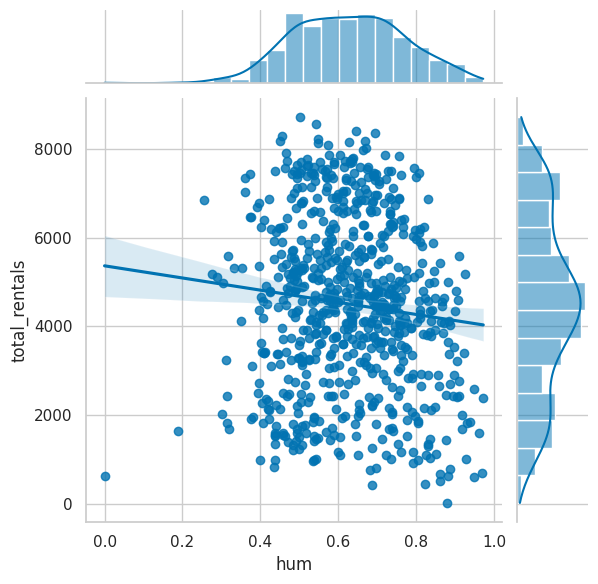

In [180]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x="hum",
              y="total_rentals",
              kind='reg',
              data=df)

plt.show()
plt.clf()


### Jointplots and regression

Since the previous plot does not show a relationship between humidity
and rental amounts, we can look at another variable that we reviewed
earlier. Specifically, the relationship between `temp` and
`total_rentals`.

**Instructions**

- Create a `jointplot` with a 2nd order polynomial regression plot
  comparing `temp` and `total_rentals`.
- Use a residual plot to check the appropriateness of the model.

**Answer**


<Figure size 640x480 with 0 Axes>

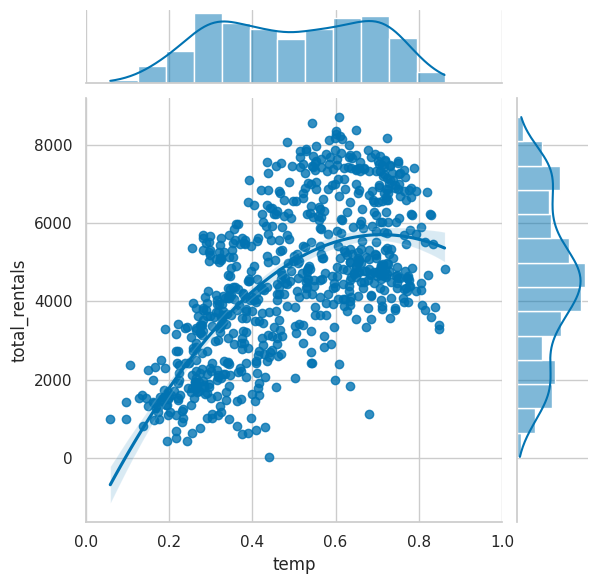

In [181]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
              y="total_rentals",
              kind='reg',
              data=df,
              order=2,
              xlim=(0, 1))

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

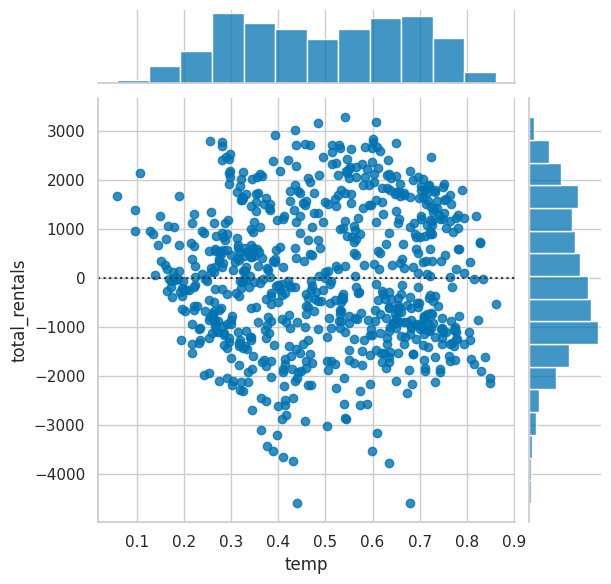

In [182]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
              y="total_rentals",
              kind='resid',
              data=df,
              order=2)

plt.show()
plt.clf()


### Complex jointplots

The `jointplot` is a convenience wrapper around many of the `JointGrid`
functions. However, it is possible to overlay some of the `JointGrid`
plots on top of the standard `jointplot`. In this example, we can look
at the different distributions for riders that are considered `casual`
versus those that are `registered`.

**Instructions**

- Create a `jointplot` with a scatter plot comparing `temp` and `casual`
  riders.
- Overlay a `kdeplot` on top of the scatter plot.
- Build a similar plot for `registered` users.

**Answer**


<Figure size 640x480 with 0 Axes>

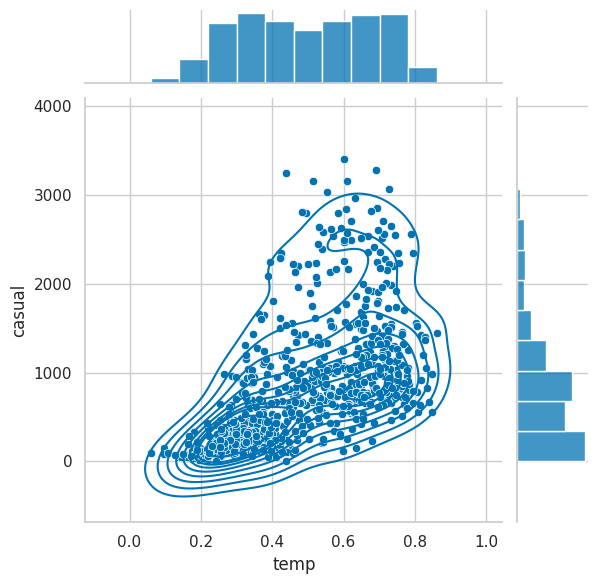

In [183]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = sns.jointplot(x="temp",
                   y="casual",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()


<Figure size 640x480 with 0 Axes>

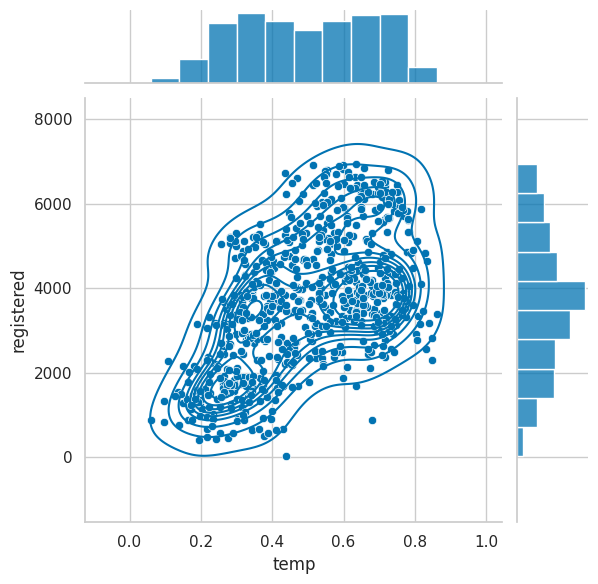

In [184]:
# Replicate the previous plot but only for registered riders
g = sns.jointplot(x="temp",
                   y="registered",
                   kind='scatter',
                   data=df,
                   marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()